In [8]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import scipy
from matplotlib.lines import Line2D
import networkx as nx
from tqdm import tqdm
import matplotlib.colors as mcolors
import seaborn as sns
import psycopg2
import statsmodels.api as sm
from plotly.subplots import make_subplots



axis_label_fontsize = 14
title_fontsize = 13
legend_fontsize = 10
parent_nace_list = ["A","B","C","F","H","G"]
tick_label_fontsize =10
pd.set_option("display.max_columns",100)

colors = [
    "#2ab421",   # Less vivid green
    "#f93a2e",  # Vivid red
    "#d02670",  # Strong pink
    "#ff7a00",  # Bright orange
    "#1dd3c1",  # Vivid turquoise
    "#8a2be2",   # Electric purple
    "#ffafd2",  # Bright pink
    "#fff537",  # Bright yellow
    "#4589ff",  # Vibrant blue
    "#d4b237",  # Bold yellow-orange
    "#c677e2",  # Lively purple
    "#a2a9b0",  # Muted grayish blue
    "#baf0ce",  # Soft green
    "#b7e1ff",  # Light blue
    "#ebeced",  # Light gray
    "#dbc7ff",  # Pale purple
    "#6fdc8c",  # Bright green
]

In [9]:
conn = psycopg2.connect(
    user="postgres", 
    host="localhost", 
    database="eutl_orm", 
    password="Thargoth69",
    port=5432
)

cursor = conn.cursor()

query_nace = "select * from nace_code"
cursor.execute(query_nace)
data_nace = list(cursor.fetchall())
df_nace = pd.DataFrame(data_nace, columns = [desc[0] for desc in cursor.description])
for i in range(len(df_nace)):
    try:
        df_nace.loc[i,"id"] = int(df_nace.loc[i,"id"].replace(".",""))
    except:
        pass
        
nace_desc_dict = dict(zip(df_nace["id"],df_nace["description"]))
nace_parent_dict = dict(zip(df_nace[df_nace.level==2]["id"],df_nace[df_nace.level==2]["parent_id"]))


In [11]:
df = pd.read_csv("data/energy_consumption_AND_growth_estimations_[2020-2023]_27067_firms_20250129.csv")
df = df.sort_values(by="parent_nace").reset_index(drop = True)
df["nace2_2022"] = df["nace2_2022"].astype(int)
df["fossil_consumption_KWH_2020"] = df["gas_consumption_KWH_2020"] + df["oil_consumption_KWH_2020"]
df["fossil_consumption_KWH_2021"] = df["gas_consumption_KWH_2021"] + df["oil_consumption_KWH_2021"]
df["fossil_consumption_KWH_2022"] = df["gas_consumption_KWH_2022"] + df["oil_consumption_KWH_2022"]
df["fossil_consumption_KWH_2023"] = df["gas_consumption_KWH_2023"] + df["oil_consumption_KWH_2023"]

df["revenue_by_employees_2022"] = df["revenue_2022"]/df["employment_2022"]
df['transitioning'] = np.where((df['clean_elec_growth'] > 0), "transitioning", "not transitioning")
df["transitioning_binary"] = np.where(((df['clean_elec_growth'] > 0) & (df['clean_elec_exp_growth']>0)), 1, 0)
## energy_input_shares
df["energy_input_share_2022"] = (df["fossil_input_2022"] + df["elec_input_unnormalized_2022"]) / df["revenue_2022"]
df["fossil_input_share_2022"] = df["fossil_input_2022"] / df["revenue_2022"]
df["elec_input_share_2022"] = df["elec_input_unnormalized_2022"] / df["revenue_2022"]

df["energy_input_share_2023"] = (df["fossil_input_2023"] + df["elec_input_unnormalized_2023"]) / df["revenue_2023"]
df["fossil_input_share_2023"] = df["fossil_input_2023"] / df["revenue_2023"]
df["elec_input_share_2023"] = df["elec_input_unnormalized_2023"] / df["revenue_2023"]


# df_manu = df[df.parent_nace=="C"].sort_values(by="nace2_2022").reset_index(drop = True)
nace2_4_dict = dict(zip(df["nace4_2022"],df["nace2_2022"]))
colors_dict = dict(zip(df.parent_nace.unique(), colors))
colors_dict

df["color"] = df["parent_nace"].map(colors_dict)
df


,nace2_2015,nace4_2015,revenue_2015,employment_2015,out_strength_2015,in_strength_2015,oil_wholesale_input_unnormalized_2015,oil_retail_input_unnormalized_2015,oil_extraction_input_unnormalized_2015,oil_manufacturing_input_unnormalized_2015,gas_input_unnormalized_2015,elec_input_unnormalized_2015,nace2_2016,nace4_2016,revenue_2016,employment_2016,out_strength_2016,in_strength_2016,oil_wholesale_input_unnormalized_2016,oil_retail_input_unnormalized_2016,oil_extraction_input_unnormalized_2016,oil_manufacturing_input_unnormalized_2016,gas_input_unnormalized_2016,elec_input_unnormalized_2016,nace2_2017,nace4_2017,revenue_2017,employment_2017,out_strength_2017,in_strength_2017,oil_wholesale_input_unnormalized_2017,oil_retail_input_unnormalized_2017,oil_extraction_input_unnormalized_2017,oil_manufacturing_input_unnormalized_2017,gas_input_unnormalized_2017,elec_input_unnormalized_2017,nace2_2018,nace4_2018,revenue_2018,employment_2018,out_strength_2018,in_strength_2018,oil_wholesale_input_unnormalized_2018,oil_retail_input_unnormalized_2018,oil_extraction_input_unnormalized_2018,oil_manufacturing_input_unnormalized_2018,gas_input_unnormalized_2018,elec_input_unnormalized_2018,nace2_2019,nace4_2019,...,elec_share_2021,elec_share_2022,elec_share_2023,total_consumption_KWH_2020,total_consumption_KWH_2021,total_consumption_KWH_2022,total_consumption_KWH_2023,avg_total_consumption_KWH,clean_elec_consumption_KWH_2020,clean_elec_consumption_KWH_2021,clean_elec_consumption_KWH_2022,clean_elec_consumption_KWH_2023,clean_elec_share_2020,clean_elec_share_2021,clean_elec_share_2022,clean_elec_share_2023,fossil_share_2020,fossil_share_2021,fossil_share_2022,fossil_share_2023,elec_delta_mean,elec_growth,elec_intercept,elec_exp_growth,elec_exp_intercept,clean_elec_delta_mean,clean_elec_growth,clean_elec_intercept,clean_elec_exp_growth,clean_elec_exp_intercept,fossil_growth,fossil_intercept,gas_delta_mean,oil_delta_mean,fossil_delta_mean,revenue_delta_mean,fossil_consumption_KWH_2020,fossil_consumption_KWH_2021,fossil_consumption_KWH_2022,fossil_consumption_KWH_2023,revenue_by_employees_2022,transitioning,transitioning_binary,energy_input_share_2022,fossil_input_share_2022,elec_input_share_2022,energy_input_share_2023,fossil_input_share_2023,elec_input_share_2023,color
0,1.0,119.0,292028.0,25.0,93346.222222,96496.555556,0.0,0.0,0.0,0.0,16117.518519,0.0,1.0,119.0,292028.0,25.0,90991.740741,152453.185185,0.0,0.0,0.0,0.0,39176.407407,0.0,1.0,119.0,278074.0,29.0,208060.851852,108636.814815,0.0,0.0,0.0,0.0,23891.666667,0.0,1.0,119.0,391692000.0,31.0,210051.555556,190629.037037,0.0,0.0,0.0,2687.0,5.075570e+07,17291000.0,1.0,119.0,...,0.020735,0.009374,0.060086,4.436156e+06,4.709007e+06,2.816546e+06,6.713610e+05,3.158267e+06,15495.838666,61939.456321,17328.703904,28305.042518,0.003493,0.013153,0.006152,0.042161,0.996507,0.986847,0.993848,0.957839,5088.123162,0.015194,0.001171,1.064202,0.002389,4269.734617,0.010900,-0.000110,1.193478,0.001147,-0.010900,23.018494,-1.256776e+06,-3243.560707,-1.260020e+06,0.000000e+00,4.411081e+06,4.611364e+06,2.790143e+06,6.310218e+05,1.322248e+07,transitioning,1,0.299134,0.292681,0.006453,0.099679,0.085012,0.014667,#2ab421
1,1.0,147.0,288014.0,25.0,344015.555556,134597.370370,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,147.0,288014.0,25.0,400158.000000,33233.777778,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,147.0,288014.0,25.0,481190.407407,69185.296296,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,147.0,288014000.0,25.0,542204.703704,142377.037037,0.0,0.0,0.0,0.0,9.000000e+05,18966000.0,1.0,147.0,...,0.100914,0.084228,0.050091,3.824478e+06,2.412958e+06,2.498031e+06,4.587548e+06,3.330753e+06,168185.634547,154464.923148,138092.408650,161242.697296,0.043976,0.064015,0.055281,0.035148,0.956024,0.935985,0.944719,0.964852,-14118.527546,-0.007989,0.088583,-0.089173,0.087202,-2314.312417,-0.003522,0.054888,-0.061023,0.054254,0.003522,-6.169097,2.685140e+05,-38.807421,2.684752e+05,0.000000e+00,3.552326e+06,2.169456e+06,2.287626e+06,4.357751e+06,1.152056e+07,not tra

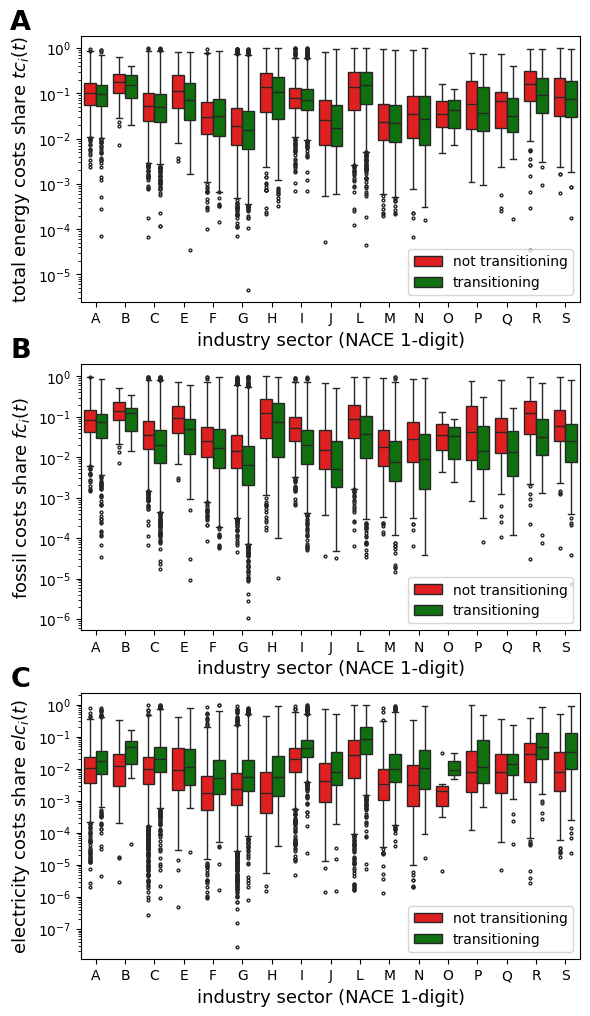

In [12]:
df['transitioning'] = np.where(((df['clean_elec_growth'] > 0) & (df['clean_elec_exp_growth']>0)), "transitioning", "not transitioning")
axis_label_fontsize = 13

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10), sharey=False)  # Adjust figsize as needed

# Plot 1: total energy input
df_energy_input = df[df.energy_input_share_2023<=1]
sns.boxplot(
    data=df_energy_input,
    x="parent_nace",
    y="energy_input_share_2023",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax = axes[0]
)

# Adjust marker size of fliers for Plot 1
for line in axes[0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[0].set_ylabel("total energy costs share $tc_i(t)$", fontsize = axis_label_fontsize)
axes[0].set_xlabel("industry sector (NACE 1-digit)", fontsize = axis_label_fontsize)

axes[0].get_legend().set_title(None)
plt.xticks(fontsize = tick_label_fontsize)
plt.yticks(fontsize = tick_label_fontsize)



# Plot 2: fossil input
df_fossil_input = df[df.fossil_input_share_2023<=1]
sns.boxplot(
    data=df_fossil_input,
    x="parent_nace",
    y="fossil_input_share_2023",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[1]
)

# Adjust marker size of fliers for Plot 2
for line in axes[1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[1].set_ylabel("fossil costs share $fc_i(t)$", fontsize = axis_label_fontsize)
axes[1].set_xlabel("industry sector (NACE 1-digit)", fontsize = axis_label_fontsize)

axes[1].get_legend().set_title(None)
plt.xticks(fontsize = tick_label_fontsize)
plt.yticks(fontsize = tick_label_fontsize)


# Plot 3: electricity input
df_elec_input = df[df.elec_input_share_2023<=1]
sns.boxplot(
    data=df_elec_input,
    x="parent_nace",
    y="elec_input_share_2023",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[2]
)

axes[2].set_ylabel("electricity costs share $elc_i(t)$", fontsize = axis_label_fontsize)
axes[2].set_xlabel("industry sector (NACE 1-digit)", fontsize = axis_label_fontsize)

axes[2].get_legend().set_title(None)
plt.xticks(fontsize = tick_label_fontsize)
plt.yticks(fontsize = tick_label_fontsize)


# Adjust marker size of fliers for Plot 2
for line in axes[2].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

plt.tight_layout()


# add letters
xpos, ypos = -0.1, 1.1

def insert_letter(a, lett):
    a.text(xpos, ypos,lett,
           fontdict={ 'size':str(1.5*axis_label_fontsize)}, transform=a.transAxes,
          zorder=100000, va='top', ha='right', weight='bold')
    
for a,l in zip([axes[0],axes[1],axes[2]],['A','B','C']):
    insert_letter(a,l)

plt.savefig("final_plots/FIG3_difference_transition_nontransition/FIG3_combined.pdf", bbox_inches = "tight", dpi = 300)


In [13]:
df_energy_input = df[df.energy_input_share_2023<=1]
df_fossil_input = df[df.fossil_input_share_2023<=1]
df_elec_input = df[df.elec_input_share_2023<=1]


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Function to apply the star significance levels based on p_value
def get_significance(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    elif p_value < 0.1:
        return '.'
    else:
        return ''

# Function to perform the logistic regression and collect results
def run_logit_regression(df, x_var, y_var):
    # Add an intercept for the logistic regression
    df['intercept'] = 1  
    X = df[[x_var, 'intercept']]
    y = df[y_var]

    # Fit the logistic regression model
    logit_model = sm.Logit(y, X)
    result = logit_model.fit(disp=False)

    # Collect the coefficient, standard error, p-value
    coef = result.params[x_var]
    std_err = result.bse[x_var]
    p_value = result.pvalues[x_var]

    # Apply the significance function
    significance = get_significance(p_value)

    # Format the coefficient with significance stars and standard error in parentheses
    coef_with_se = f"{coef:.3f}{significance} ({std_err:.3f})"

    return coef_with_se, np.format_float_scientific(p_value, precision=3)

# Dictionary to store results for each industry sector
results = {}

# Iterate over each unique parent_nace category
for parent_nace in df_energy_input['parent_nace'].unique():
    # Filter the dataframes for the current industry sector
    sector_df_energy = df_energy_input[df_energy_input['parent_nace'] == parent_nace]
    sector_df_fossil = df_fossil_input[df_fossil_input['parent_nace'] == parent_nace]
    sector_df_elec = df_elec_input[df_elec_input['parent_nace'] == parent_nace]

    # Run regressions for each dataframe
    coef_energy, p_value_energy = run_logit_regression(sector_df_energy, 'energy_input_share_2023', 'transitioning_binary')
    coef_fossil, p_value_fossil = run_logit_regression(sector_df_fossil, 'fossil_input_share_2023', 'transitioning_binary')
    coef_elec, p_value_elec = run_logit_regression(sector_df_elec, 'elec_input_share_2023', 'transitioning_binary')

    # Store results in the dictionary
    results[parent_nace] = {
        r'$\beta_{ec_i}$ ': coef_energy,
        # 'p_value_energy': p_value_energy,
        r'$\beta_{fc_i}$': coef_fossil,
        # 'p_value_fossil': p_value_fossil,
        r'$\beta_{elc_i}$': coef_elec,
        # 'p_value_elec': p_value_elec
    }

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results).T  # Transpose to have parent_nace as rows

# Display the updated results
latex_table = results_df.to_latex(
    caption="",
    label="tab:regression_energy_input_share",
    column_format="llllll",  # Adjust column alignment (l = left, c = center)
    header=True,  # Include header
    index=True,  # Include index (parent_nace categories)
    float_format="%.3f",  # Display floating point numbers with 3 decimals
    escape=False  # Allow special characters like % in the table
)

# Print the LaTeX code
print(latex_table)
with open("final_tables/FIG3_regression_tables.txt", "w") as f:
    f.write(latex_table)

C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept'] = 1
C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept'] = 1
C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

\begin{table}
\label{tab:regression_energy_input_share}
\begin{tabular}{llllll}
\toprule
 & $\beta_{ec_i}$  & $\beta_{fc_i}$ & $\beta_{elc_i}$ \\
\midrule
A & -0.212 (0.433) & -1.857*** (0.512) & 3.718*** (0.947) \\
B & -1.113 (2.221) & -3.324 (2.852) & 6.014 (5.731) \\
C & -0.065 (0.230) & -2.429*** (0.315) & 7.582*** (0.673) \\
E & -1.482. (0.843) & -3.516** (1.266) & 1.304 (1.483) \\
F & 0.493 (0.417) & -1.231* (0.518) & 5.333*** (1.063) \\
G & 0.102 (0.223) & -1.971*** (0.301) & 6.565*** (0.698) \\
H & -0.832. (0.446) & -1.151* (0.448) & 5.835** (1.946) \\
I & -0.319 (0.316) & -4.307*** (0.528) & 4.857*** (0.670) \\
J & -0.817 (0.747) & -4.921*** (1.460) & 4.627** (1.777) \\
L & 0.312. (0.177) & -2.766*** (0.266) & 4.694*** (0.356) \\
M & 0.461 (0.435) & -2.286*** (0.626) & 6.829*** (1.267) \\
N & -0.059 (0.506) & -1.848** (0.673) & 8.607*** (1.964) \\
O & 1.927 (14.029) & -3.330 (18.202) & 67.824 (60.448) \\
P & -0.872 (1.131) & -4.605* (2.104) & 0.819 (1.536) \\
Q & -3.951. (2.35

C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept'] = 1
C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept'] = 1
C:\Users\Johannes\AppData\Local\Temp\ipykernel_21836\3599089908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


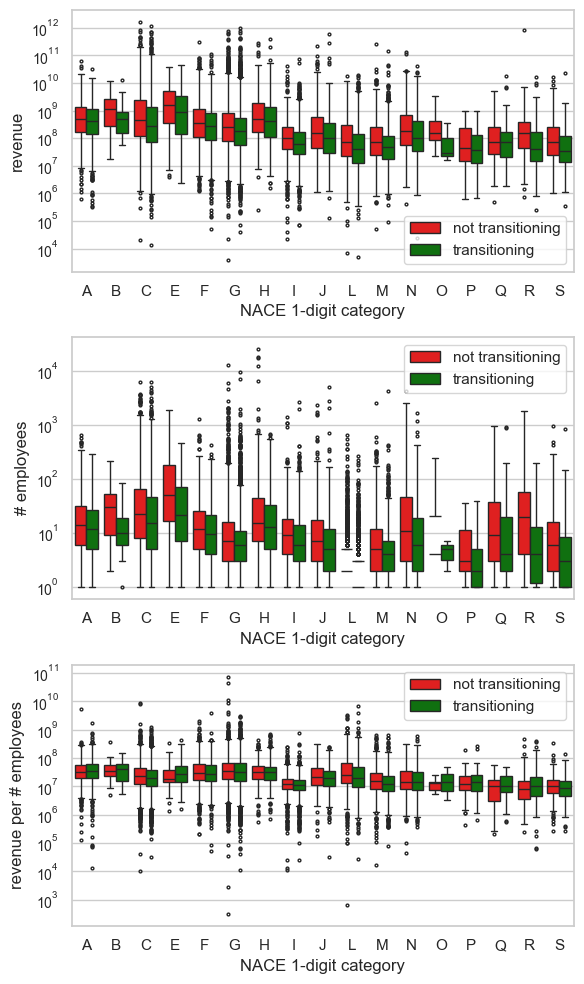

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10), sharey=False)  # Adjust figsize as needed

# Plot 1: Revenue 2022
sns.boxplot(
    data=df,
    x="parent_nace",
    y="revenue_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[0]
)

# Adjust marker size of fliers for Plot 1
for line in axes[0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)


axes[0].set_ylabel("revenue")
axes[0].set_xlabel("NACE 1-digit category")
# axes[0].set_title('Revenue distribution by NACE1 code')
# axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45, ha='right')
axes[0].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Plot 2: Employment 2022
sns.boxplot(
    data=df,
    x="parent_nace",
    y="employment_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[1]
)

# Adjust marker size of fliers for Plot 2
for line in axes[1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[1].set_ylabel("# employees")
axes[1].set_xlabel("NACE 1-digit category")
# axes[1].set_title('# employees distribution by NACE1 code')
# axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45, ha='right')
axes[1].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Plot 3: Revenue by Employment 2022
sns.boxplot(
    data=df,
    x="parent_nace",
    y="revenue_by_employees_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[2], 
    
)

# Adjust marker size of fliers for Plot 3
for line in axes[2].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[2].set_ylabel("revenue per # employees")
axes[2].set_xlabel("NACE 1-digit category")
# axes[2].set_title('Revenue per # employees distribution by NACE1 code')
# axes[2].set_xticklabels(axes[2].get_xticks(), rotation=45, ha='right')
axes[2].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Adjust layout
plt.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title=None)
axes[1].legend(handles=handles, labels=labels, title=None)
axes[2].legend(handles=handles, labels=labels, title=None)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig("final_plots/FIG3_difference_transition_nontransition/FIG3a_difference_revenue_NACE1.pdf",dpi = 300)



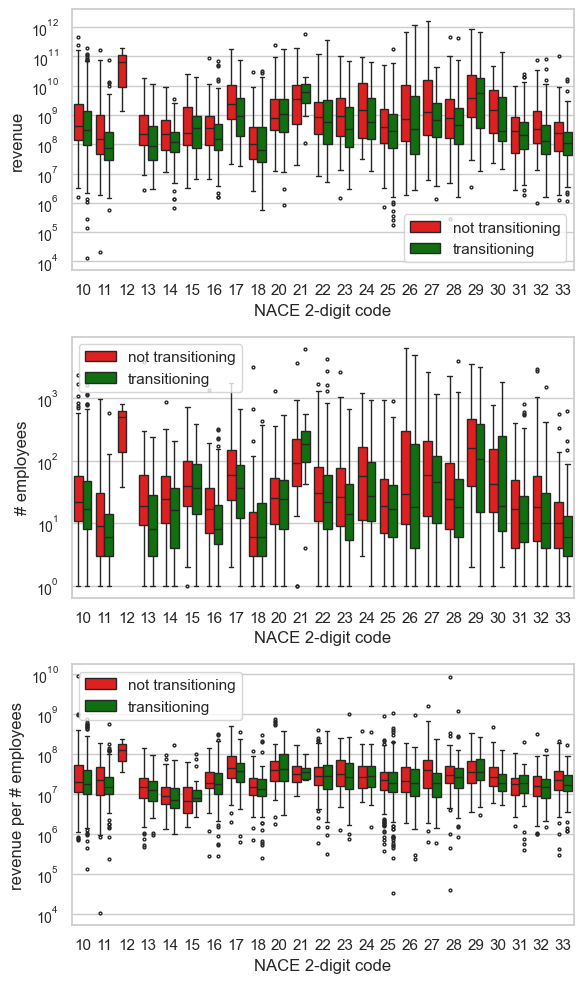

In [67]:
df_manufacturing = df[df.parent_nace=="C"]

# Sample DataFrame for demonstration
# np.random.seed(0)
# df = pd.DataFrame({
#     'parent_nace': np.random.choice(['Category1', 'Category2', 'Category3'], size=300),
#     'revenue_2022': np.random.exponential(scale=1000, size=300),
#     'employment_2022': np.random.exponential(scale=50, size=300),
#     'revenue_by_employment_2022': np.random.exponential(scale=20, size=300),
#     'transitioning': np.random.choice(['not transitioning', 'transitioning'], size=300)
# })

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10), sharey=False)  # Adjust figsize as needed

# Plot 1: Revenue 2022
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="revenue_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[0]
)

# Adjust marker size of fliers for Plot 1
for line in axes[0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)


axes[0].set_ylabel("revenue")
axes[0].set_xlabel("NACE 2-digit code")
# axes[0].set_title('MANUFACTURING: Revenue distribution by NACE2 code')
# axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45, ha='right')
axes[0].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Plot 2: Employment 2022
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="employment_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[1]
)

# Adjust marker size of fliers for Plot 2
for line in axes[1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[1].set_ylabel("# employees")
axes[1].set_xlabel("NACE 2-digit code")
# axes[1].set_title('MANUFACTURING: # employees distribution by NACE2 code')
# axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45, ha='right')
axes[1].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Plot 3: Revenue by Employment 2022
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="revenue_by_employees_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[2], 
    
)

# Adjust marker size of fliers for Plot 3
for line in axes[2].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[2].set_ylabel("revenue per # employees")
axes[2].set_xlabel("NACE 2-digit code")
# axes[2].set_title('evenue per # employees distribution by NACE2 code')
# axes[2].set_xticklabels(axes[2].get_xticks(), rotation=45, ha='right')
axes[2].tick_params(axis='y', labelsize=10)  # Show y-ticks with a specific size

# Adjust layout
plt.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title=None)
axes[1].legend(handles=handles, labels=labels, title=None)
axes[2].legend(handles=handles, labels=labels, title=None)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig("final_plots/FIG3_difference_transition_nontransition/FIG3b_difference_MANUFACTURING_NACE2.pdf",dpi = 300)



C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\Johannes\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


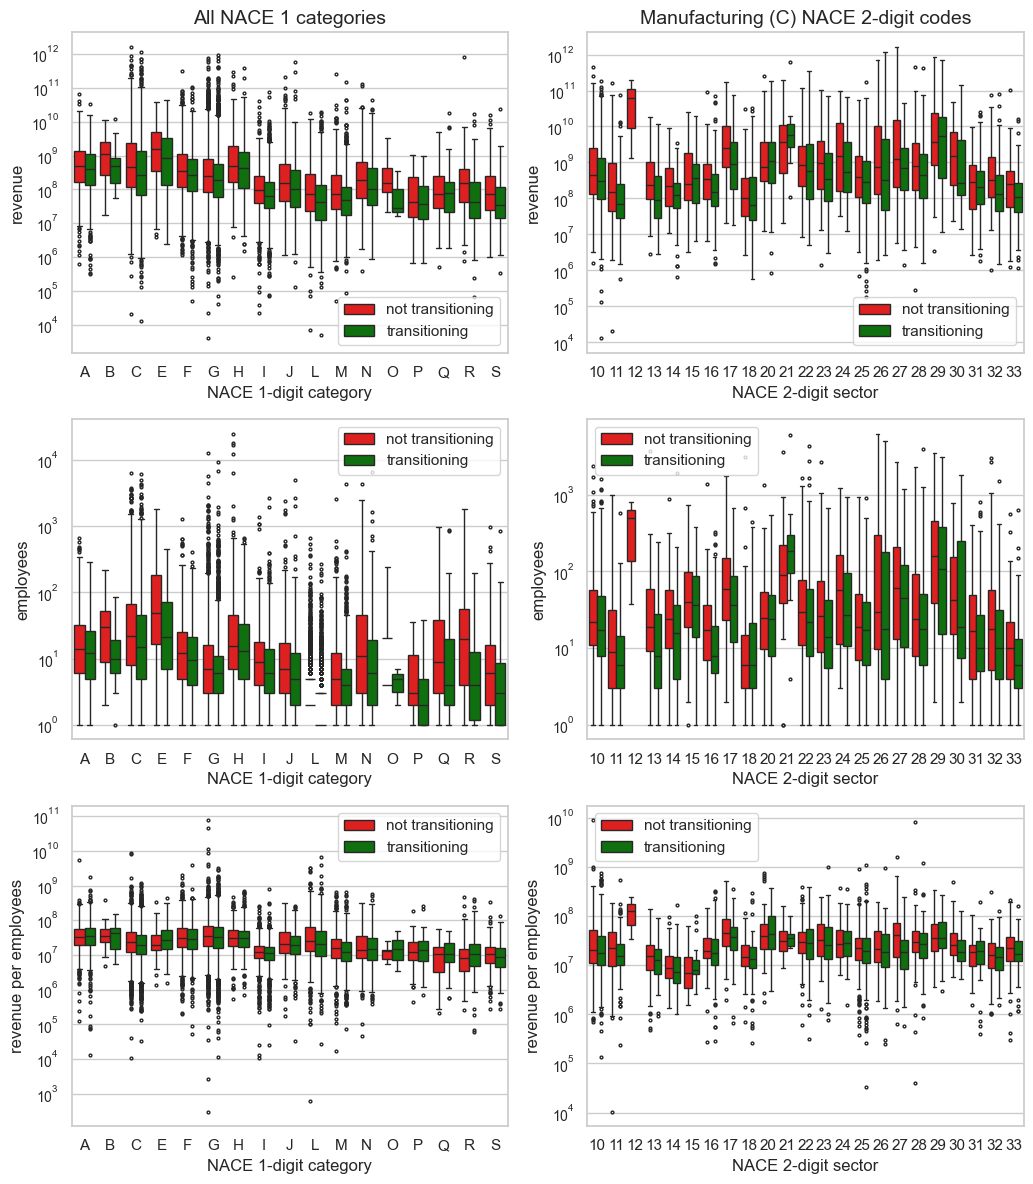

In [91]:
df_manufacturing = df[df.parent_nace == "C"]  # Filter for a specific category

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10.5, 12), sharey=False)  # Adjust figsize as needed

# Plot 1: Revenue 2022 (Overall)
sns.boxplot(
    data=df,
    x="parent_nace",
    y="revenue_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[0, 0]
)

# Adjust marker size of fliers for Plot 1
for line in axes[0, 0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[0, 0].set_ylabel("revenue")
axes[0, 0].set_xlabel("NACE 1-digit category")
axes[0, 0].tick_params(axis='y', labelsize=10)
axes[0, 0].set_title("All NACE 1 categories", fontsize = title_fontsize)

# Plot 2: Revenue 2022 (Manufacturing)
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="revenue_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[0, 1]
)

# Adjust marker size of fliers for Plot 2
for line in axes[0, 1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[0, 1].set_ylabel("revenue")
axes[0, 1].set_xlabel("NACE 2-digit sector")
axes[0, 1].tick_params(axis='y', labelsize=10)
axes[0, 1].set_title("Manufacturing (C) NACE 2-digit codes", fontsize = title_fontsize)

# Plot 3: Employment 2022 (Overall)
sns.boxplot(
    data=df,
    x="parent_nace",
    y="employment_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[1, 0]
)

# Adjust marker size of fliers for Plot 3
for line in axes[1, 0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[1, 0].set_ylabel("employees")
axes[1, 0].set_xlabel("NACE 1-digit category")
axes[1, 0].tick_params(axis='y', labelsize=10)

# Plot 4: Employment 2022 (Manufacturing)
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="employment_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[1, 1]
)

# Adjust marker size of fliers for Plot 4
for line in axes[1, 1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[1, 1].set_ylabel("employees")
axes[1, 1].set_xlabel("NACE 2-digit sector")
axes[1, 1].tick_params(axis='y', labelsize=10)

# Plot 5: Revenue by Employment 2022 (Overall)
sns.boxplot(
    data=df,
    x="parent_nace",
    y="revenue_by_employees_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[2, 0]
)

# Adjust marker size of fliers for Plot 5
for line in axes[2, 0].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[2, 0].set_ylabel("revenue per employees")
axes[2, 0].set_xlabel("NACE 1-digit category")
axes[2, 0].tick_params(axis='y', labelsize=10)

# Plot 6: Revenue by Employment 2022 (Manufacturing)
sns.boxplot(
    data=df_manufacturing,
    x="nace2_2022",
    y="revenue_by_employees_2022",
    hue="transitioning",
    palette={"not transitioning": "red", "transitioning": "green"},
    hue_order=["not transitioning", "transitioning"],
    log_scale=True,
    ax=axes[2, 1]
)

# Adjust marker size of fliers for Plot 6
for line in axes[2, 1].lines:
    if line.get_marker() == 'o':
        line.set_markersize(2)

axes[2, 1].set_ylabel("revenue per employees")
axes[2, 1].set_xlabel("NACE 2-digit sector")
axes[2, 1].tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()

# Add legends for all plots (using the first plot's legend)
handles, labels = axes[0, 0].get_legend_handles_labels()
for ax in axes.flat:  # Use .flat to iterate over all axes
    ax.legend(handles=handles, labels=labels, title=None)

plt.savefig("final_plots/FIG3_difference_transition_nontransition/FIG3_differences_ALL_MANUFACTURING_combined.png", dpi = 300)
# plt.savefig("final_plots/FIG3_difference_transition_nontransition/FIG3_differences_ALL_MANUFACTURING_combined.pdf", dpi = 300)